In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df_pre=df

In [ ]:
df_pre['date'] = df_pre['date'].astype("string")


In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  string 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df_pre[['date_f','ti']]=df_pre['date'].str.split(' ',1, expand=True)

In [ ]:
df_split = df_pre[['date_f','ti']]

In [ ]:
df_split

,date_f,ti
0,2016-01-11,17:00:00
1,2016-01-11,17:10:00
2,2016-01-11,17:20:00
3,2016-01-11,17:30:00
4,2016-01-11,17:40:00
...,...,...
19730,2016-05-27,17:20:00
19731,2016-05-27,17:30:00
19732,2016-05-27,17:40:00
19733,2016-05-27,17:50:00


In [ ]:
df_pre

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_f,ti
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00


In [ ]:
df_pre['Datetime'] = pd.to_datetime(df_pre['date_f'] + ' ' + df_pre['ti'],format = '%Y/%m/%d %H:%M')
df_pre = df_pre.set_index('Datetime')

In [ ]:
df_pre

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date_f,ti
Datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00
2016-05-27 17:30:00,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00
2016-05-27 17:40:00,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00


In [ ]:
# import datetime
# datetime.datetime.strptime(df_pre.date,'%m/%d/%Y %H:%M').strftime('%d/%m/%Y %H:%M')


In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  string 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8       

In [ ]:
def ev_univ(input_col,pred_col):
    ev_univ = df_pre[[input_col,pred_col]]
    ev_univ_agg = ev_univ.groupby([input_col]).agg({pred_col:np.sum})
    return ev_univ_agg    

In [ ]:
uni_1 = ev_univ('date_f','Appliances')
uni_2 = uni_1.reset_index()

In [ ]:
uni_2['date_f'].to_list().sort()

In [ ]:
uni_2

,date_f,Appliances
0,2016-01-11,5740
1,2016-01-12,12340
2,2016-01-13,13970
3,2016-01-14,21800
4,2016-01-15,18050
...,...,...
133,2016-05-23,11960
134,2016-05-24,13850
135,2016-05-25,12080
136,2016-05-26,21170


In [ ]:
uni_2['date_f']=pd.to_datetime(uni_2['date_f'],format = '%Y/%m/%d')

In [ ]:
uni_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_f      138 non-null    datetime64[ns]
 1   Appliances  138 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [ ]:
uni_2.set_index('date_f',inplace=True)

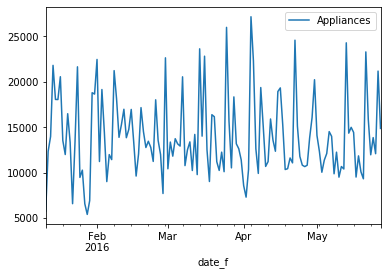

In [ ]:
uni_2.plot()

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(uni_2['Appliances'])

(0.01, False)

In [ ]:
x=len(uni_2)
x

138

In [ ]:
uni_2.sort_index()

,Appliances
date_f,
2016-01-11,5740
2016-01-12,12340
2016-01-13,13970
2016-01-14,21800
2016-01-15,18050
...,...
2016-05-23,11960
2016-05-24,13850
2016-05-25,12080


In [ ]:
uni_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2016-01-11 to 2016-05-27
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  138 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
train = uni_2.loc[:'2016-04-29']
test = uni_2.loc['2016-04-29':]


In [ ]:
train = train.sort_index()
test = test.sort_index()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2016-04-29 to 2016-05-27
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  29 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


In [ ]:
train

,Appliances
date_f,
2016-01-11,5740
2016-01-12,12340
2016-01-13,13970
2016-01-14,21800
2016-01-15,18050
...,...
2016-04-25,10820
2016-04-26,10660
2016-04-27,10810


In [ ]:
test

,Appliances
date_f,
2016-04-29,16060
2016-04-30,20220
2016-05-01,14090
2016-05-02,12330
2016-05-03,10040
2016-05-04,11370
2016-05-05,12100
2016-05-06,14510
2016-05-07,13990


(array([735985., 735995., 736016., 736024., 736045., 736055., 736076.,
        736085., 736106., 736116.]),
 <a list of 10 Text xticklabel objects>)

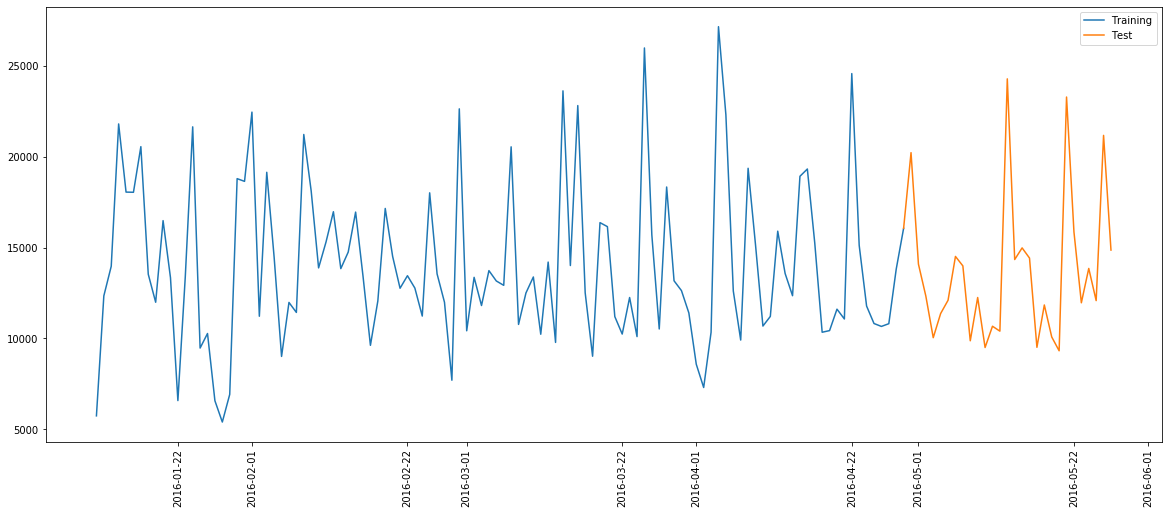

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.legend()
plt.xticks(rotation=90)

In [ ]:
from pmdarima import auto_arima   # SARIMA and SARIMAX pmdarima training with (p,d,q),(P,D,Q) - (1,1,1)(0,1,7)
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=7, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 29),index=test.index)
prediction.columns = ['predicted_appliances_demand']
prediction

,predicted_appliances_demand
date_f,
2016-04-29,16493.913377
2016-04-30,15103.948238
2016-05-01,13262.966233
2016-05-02,17090.387163
2016-05-03,14318.267668
2016-05-04,11698.470900
2016-05-05,13377.031838
2016-05-06,11607.769632
2016-05-07,9698.771955


(array([735985., 735995., 736016., 736024., 736045., 736055., 736076.,
        736085., 736106., 736116.]),
 <a list of 10 Text xticklabel objects>)

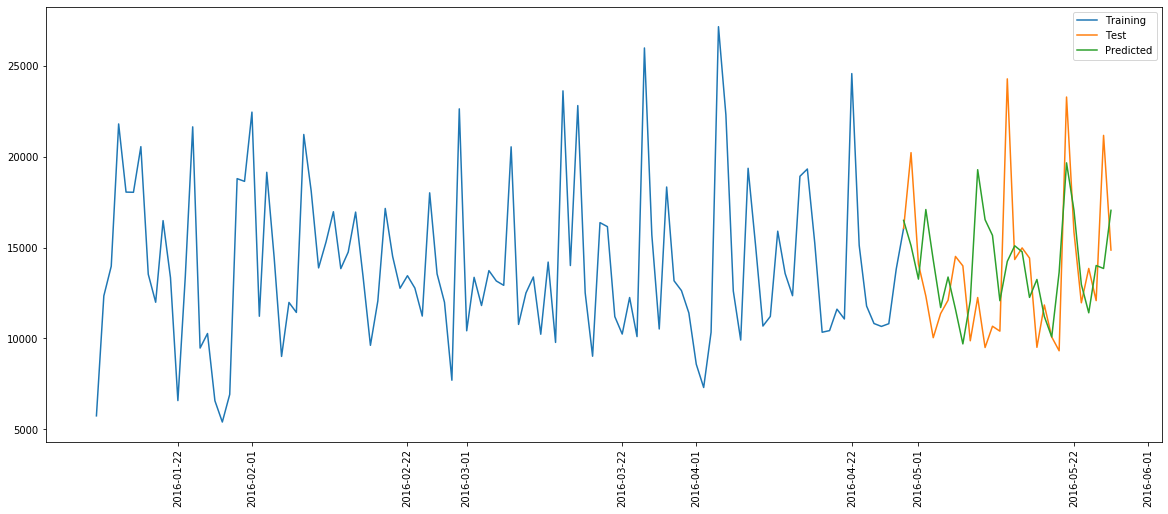

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.xticks(rotation=90)

In [ ]:
test['predicted_appliances_demand'] = prediction

In [ ]:
test

,Appliances,predicted_appliances_demand
date_f,,
2016-04-29,16060,16493.913377
2016-04-30,20220,15103.948238
2016-05-01,14090,13262.966233
2016-05-02,12330,17090.387163
2016-05-03,10040,14318.267668
2016-05-04,11370,11698.470900
2016-05-05,12100,13377.031838
2016-05-06,14510,11607.769632
2016-05-07,13990,9698.771955


In [8]:
#ARIMA Performance Metrics - RMSE
from sklearn.metrics import mean_squared_error


test['predicted_appliances_demand'] = prediction
rmse_arima = round(np.sqrt(mean_squared_error(test['Appliances'],test['predicted_appliances_demand'])),2) # Rounding the RMSE values to two decimal points
print(f"RMSE for ARIMA Model - {rmse_arima}")



RMSE for ARIMA Model - 68.54


In [11]:
#SARIMA Performance Metrics - RMSE
from sklearn.metrics import mean_squared_error


test['predicted_appliances_demand'] = prediction
rmse_in_SARIMA = round(np.sqrt(mean_squared_error(test['Appliances'],test['predicted_appliances_demand'])),2)
print(f"RMSE for In SARIMA Model - {rmse_in}")

RMSE for In SARIMA Model - 65.98


In [13]:
#SARIMAX Performance Metrics - RMSE
from sklearn.metrics import mean_squared_error


test['predicted_appliances_demand'] = prediction
rmse_sarimax = round(np.sqrt(mean_squared_error(test['Appliances'],test['predicted_appliances_demand'])),2)
print(f"RMSE for SARIMAX Model - {rmse_sarimax}")

RMSE for SARIMAX Model - 62.86


In [23]:
#ARIMA Performance Metrics - R2 Score
from sklearn.metrics import r2_score
r2_arima = round(r2_score(test['Appliances'],test['predicted_appliances_demand']),3)
print('R Squared Score for ARIMA Model is:',r2_arima)

R Squared Score for ARIMA Model is: 0.512


In [28]:
#SARIMA Performance Metrics - R2 Score
from sklearn.metrics import r2_score
r2_sarima = round(r2_score(test['Appliances'],test['predicted_appliances_demand']),3)
print('R Squared Score for SARIMA Model is:',r2_sarima)

R Squared Score for SARIMA Model is: 0.536


In [26]:
#SARIMAX Performance Metrics - R2 Score
from sklearn.metrics import r2_score
r2_sarimax = round(r2_score(test['Appliances'],test['predicted_appliances_demand']),3)
print('R Squared Score for SARIMAX Model is:',r2_sarimax)

R Squared Score for SARIMAX Model is: 0.556
